# CBC example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the `MILPRouter` with **CBC Solver**.

## Load data

import required modules

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [3]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

<Axes: >

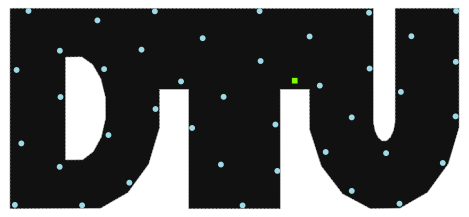

In [4]:
wfn.plot_location()

## Optimize

Warmstart with `EWRouter`:

In [5]:
res_warmstart= wfn.optimize(router=EWRouter())
print(wfn.length())

1820.1681190424422


In [6]:
milp_router = MILPRouter(solver_name='cbc', time_limit=60, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

Using warm start: the model is initialized with the provided solution S.

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - C:\my_program_files\cbc\bin\cbc.exe -threads 8 -timeMode elapsed -nodeStrategy downFewest -Dins on -VndVariableNeighborhoodSearch on -Rens on -Rins on -pivotAndComplement off -proximitySearch off -gomoryCuts on -mixedIntegerRoundingCuts on -flowCoverCuts on -cliqueCuts off -twoMirCuts off -knapsackCuts off -probingCuts off -zeroHalfCuts off -liftAndProjectCuts off -residualCapacityCuts off -seconds 150 -ratioGap 0.005 -printingOptions all -import C:\Users\amia\AppData\Local\Temp\tmpe2i80vz_.pyomo.lp -mipstart \Users\amia\AppData\Local\Temp\tmp5rlhx0bo.cbc.soln -stat=1 -solve -solu C:\Users\amia\AppData\Local\Temp\tmpe2i80vz_.pyomo.soln (default strategy 1)
threads was changed from 0 to 8
Option for timeMode changed from cpu to elapsed
Option for nodeStrategy changed from fewest to downfewest
Option for Dins changed from off 

In [7]:
wfn.G.SolutionInfo

SolutionInfo(runtime=32.63, bound=1575.35543592, objective=1575.35543592, relgap=0.0, termination='optimal')

In [8]:
wfn.length()

1575.355435924007

<Axes: >

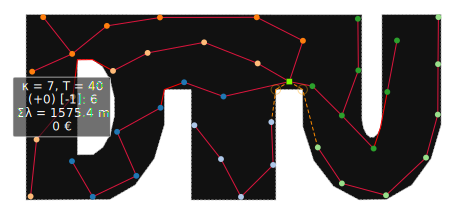

In [9]:
wfn.plot()